In [ ]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# marathon_2015_2017.csv 파일을 읽어들여 marathon_2015_2017_qualifying 파일을 생성한다.

# pandas 를 불러옵니다.
import pandas as pd

# marathon_qualifying_time.csv 파일을 읽어와 marathon_qualifying_time DataFrame 을 생성합니다.
marathon_qualifying_time = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_qualifying_time.csv")

# marathon_qualifying_time 에서 'F', 'M' column만 가져옵니다.
qualifying_time = pd.DataFrame(marathon_qualifying_time,columns=['F', 'M'])

# numpy 를 불러옵니다.
import numpy as np

# to_timedelta 함수를 사용해 문자열(object) 데이터 타입을 timedelta 데이터 타입으로 변환
qualifying_time['F'] = pd.to_timedelta(qualifying_time['F'])
qualifying_time['M'] = pd.to_timedelta(qualifying_time['M'])

# astype 함수를 사용해 시간을 초로 변환한 다음 숫자형(int) 데이터 타입으로 변환
qualifying_time['F'] = qualifying_time['F'].astype('m8[s]').astype(np.int64)
qualifying_time['M'] = qualifying_time['M'].astype('m8[s]').astype(np.int64)

# marathon_2015_2017.csv 파일을 읽어와 marathon_2015_2017 DataFrame 을 생성합니다.
marathon_2015_2017 = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017.csv")
# 'M/F' column은 'M'->1, 'F'->0 으로 변환하여 저장합니다.
marathon_2015_2017['M/F'] = marathon_2015_2017['M/F'].map({'M': 1, 'F': 0})

# qualifying_time DataFrame을 리스트로 변환합니다.
qualifying_time_list = qualifying_time.values.tolist()

# 'M/F', 'Age', 'Pace', 'Official Time', 'Year', 'qualifying' column를 갖는 새로운 marathon_2015_2017_qualifying DateFrame을 생성합니다.
marathon_2015_2017_qualifying = pd.DataFrame(columns=['M/F', 'Age', 'Pace', 'Official Time', 'Year', 'qualifying'])

for index, record in marathon_2015_2017.iterrows():    # iterrow() 는 DataFrame에서 한줄씩 가져옴
    # 나이, 성별에 따른 qualifying time 을 가져온다.
    qualifying_standard = qualifying_time_list[record.Age-18][record['M/F']]  # 18세 이하는 없기 때문에 18를 빼준다.
    
    qualifying_status = 1  # qualify 로 초기화
    
    # 나이, 성별에 따른 qualifying time 보다 최종완주시간이 크다면 disqualify
    if (record['Official Time'] > qualifying_standard): 
        qualifying_status = 0   # disqualify 처리
    
    # DataFrame에 append 함수를 사용하여 두개의 DataFrame 을 병합합니다.
    # marathon_2015_2017_qualifying 에 dictionary를 추가하여 병합합니다.
    marathon_2015_2017_qualifying = marathon_2015_2017_qualifying.append({'M/F' : record['M/F'],
                                                                          'Age' : record['Age'],
                                                                          'Pace' : record['Pace'],
                                                                          'Official Time' : record['Official Time'],
                                                                          'Year' : record['Year'],
                                                                          'qualifying' : qualifying_status
                                                                          },
                                                                        ignore_index=True)
    
# marathon_2015_2017_qualifying DataFrame을 marathon_2015_2017_qualifying.csv 파일로 저장
marathon_2015_2017_qualifying.to_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017_qualifying.csv", index = None, header=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
416/416 [==============================] - 0s 802us/step - loss: 0.5257 - accuracy: 0.7297
Epoch 2/200
416/416 [==============================] - 0s 765us/step - loss: 0.4730 - accuracy: 0.7678
Epoch 3/200
416/416 [==============================] - 0s 818us/step - loss: 0.4454 - accuracy: 0.7883
Epoch 4/200
416/416 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8061
Epoch 5/200
416/416 [==============================] - 0s 787us/step - loss: 0.4056 - accuracy: 0.8226
Epoch 6/200
416/416 [==============================] - 0s 782us/step - loss: 0.3892 - accuracy: 0.8374
Epoch 7/200
416/416 [===================

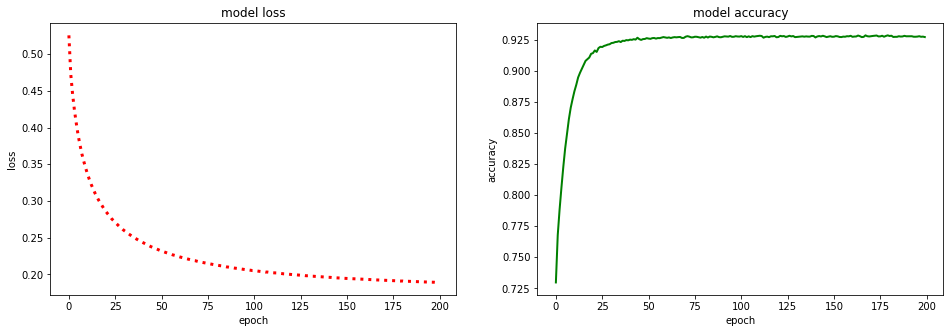




                Gender        Age       Pace

                  Male         24        297


               ****Qualifying Prediction****

Prediction Result        ML Prediction          Real Result


 0.9998301                 Qualifier               Qualifier




In [ ]:
# normalization
def normalization(record):
    r0 = record[0]
    r1 = record[1] / 10
    r2 = record[2] / 100
    return [r0, r1, r2]

# 만들어진 모델에 대해 train dataset의 loss, accuracy 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(16,5))

    # 만들어진 모델에 대해 train dataset의 loss 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r:', linewidth=3)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

    # 만들어진 모델에 대해 train dataset의 accuracy 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'g-', linewidth=2)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    
    plt.show()
    
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017_qualifying.csv 파일을 읽어와 marathon_2015_2017_qualifying DataFrame 을 생성합니다.
marathon_2015_2017_qualifying = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017_qualifying.csv")

# 2015~2016년도 데이터만 가져와 marathon_2015_2016 DataFrame을 생성합니다.
marathon_2015_2016 = marathon_2015_2017_qualifying[marathon_2015_2017_qualifying['Year'] != 2017]
# 2017년도 데이터만 가져와 marathon_2017 DataFrame 생성합니다.
marathon_2017 = marathon_2015_2017_qualifying[marathon_2015_2017_qualifying['Year'] == 2017]

# marathon_2015_2016에서 'M/F', 'Age', 'Pace', 'qualifying' column만 가져옵니다.
df_2015_2016 = pd.DataFrame(marathon_2015_2016,columns=['M/F', 'Age', 'Pace', 'qualifying'])
# marathon_2017에서 'M/F', 'Age', 'Pace', 'qualifying' column만 가져옵니다.
df_2017 = pd.DataFrame(marathon_2017,columns=['M/F', 'Age', 'Pace', 'qualifying'])

# df_2015_2016 DataFrame을 리스트로 변환합니다.
record_2015_2016 = df_2015_2016.values.tolist()
# df_2017 DataFrame을 리스트로 변환합니다.
record_2017 = df_2017.values.tolist()

# gender_list 정의
gender_list = ['Female', 'Male']

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

t_t = 200     # training 횟수(epoch)
t_r = 0.1     # learning rate
t_s = 1       # 등수

# train dataset 정의
x_train = [normalization(r[0:3]) for r in record_2015_2016]
y_train = [[r[-1]] for r in record_2015_2016]

# test dataset 정의
x_test = [normalization(r[0:3]) for r in record_2017]
y_test = [[r[-1]] for r in record_2017]

# 모델 구성하기
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(3,), activation='sigmoid'))
# 모델 학습과정 설정하기
sgd = tf.keras.optimizers.SGD(lr=t_r)
model.compile(loss='binary_crossentropy', 
                  optimizer=sgd,
                  metrics=['accuracy'])

# 모델 구성 확인하기
model.summary()

# 모델 학습시키기
history = model.fit(np.array(x_train), np.array(y_train), epochs=t_t, batch_size=128)

# 그래프 출력
display_graph()

# 예측하기        
runner = x_test[t_s-1]
pre_result = model.predict(np.array([runner]))

# 예측 결과 출력
print('\n\n')
print("%22s %10s %10s" % ('Gender', 'Age', 'Pace')+'\n')
print("%22s %10s %10s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]))+'\n\n')
print("%45s" % ('****Qualifying Prediction****\n'))
print("%10s %20s %20s" % ('Prediction Result', 'ML Prediction', 'Real Result')+'\n\n')

if (pre_result[0][0] > 0.5):
    print("%10.7f %25s %25s" % (pre_result[0][0], 'Qualifier', 'Qualifier\n\n' if y_test[t_s-1][0]==1 else 'DisQualifier\n\n'))
else:
    print("%10.7f %25s %25s" % (pre_result[0][0], 'DisQualifier', 'Qualifier\n\n' if y_test[t_s-1][0]==1 else 'DisQualifier\n\n'))    

In [ ]:
t_s = 500  # 등수

# test dataset 으로 예측        
runner = x_test[t_s-1]
pre_result = model.predict(np.array([runner]))

# 예측 결과 출력
print('\n\n')
print("%22s %10s %10s" % ('Gender', 'Age', 'Pace')+'\n')
print("%22s %10s %10s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]))+'\n\n')
print("%45s" % ('****Qualifying Prediction****\n'))
print("%10s %20s %20s" % ('Prediction Result', 'ML Prediction', 'Real Result')+'\n\n')

if (pre_result[0][0] > 0.5):
    print("%10.7f %25s %25s" % (pre_result[0][0], 'Qualifier', 'Qualifier\n\n' if y_test[t_s-1][0]==1 else 'DisQualifier\n\n'))
else:
    print("%10.7f %25s %25s" % (pre_result[0][0], 'DisQualifier', 'Qualifier\n\n' if y_test[t_s-1][0]==1 else 'DisQualifier\n\n'))    




                Gender        Age       Pace

                  Male         47        386


               ****Qualifying Prediction****

Prediction Result        ML Prediction          Real Result


 0.9989427                 Qualifier               Qualifier


